In [1]:
from kbmodpy import kbmod as kb
import numpy
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
path = '../../HITS/test_35/4,6tempExp/new_header/'

In [3]:
files = os.listdir(path)

In [4]:
files.sort()
files = [path+f for f in files]
files = files[:5]
files

['../../HITS/test_35/4,6tempExp/new_header/v410913-fg.fits',
 '../../HITS/test_35/4,6tempExp/new_header/v410969-fg.fits',
 '../../HITS/test_35/4,6tempExp/new_header/v411019-fg.fits',
 '../../HITS/test_35/4,6tempExp/new_header/v411053-fg.fits',
 '../../HITS/test_35/4,6tempExp/new_header/v411253-fg.fits']

In [5]:
stack = kb.image_stack(files)

In [6]:
flags = ~0 # mask a pixel with any flag
flag_exceptions = [32,39]#int('100000', 2) # unless it also has this flag
master_flags = int('100111', 2) # mask any pixels which have any of 
# these more than two times

In [7]:
stack.apply_mask_flags(flags, flag_exceptions)

In [8]:
stack.apply_master_mask(master_flags, 2)

In [9]:
images = stack.get_images()

In [51]:
img = images[3]

In [52]:
sub = img.science()

In [53]:
sub = sub[ 2400:3900,2800:4000]

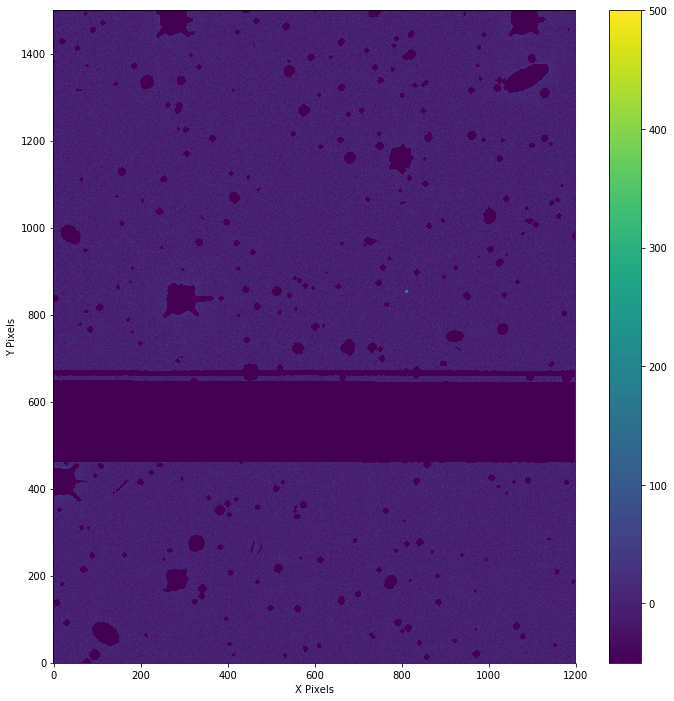

In [54]:
fig = plt.figure(figsize=(12,12))
plt.imshow(sub, origin='lower',  vmin=-50, vmax=500)#cmap=plt.cm.Greys_r,
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.colorbar()